In [26]:
import numpy as np
import random

def step(rels, pb, pr, pn):
    baby_index = random.randrange(0,N)
    parent_index = random.choice(range(0, baby_index) + range(baby_index+1, N)) # excludes dead index
    
    #killing the guy. he is not a friend of anybody now
    rels[:,baby_index] = np.zeros(N) 
    rels[baby_index] = np.zeros(N) 
    
    parent_friends_indexes = np.where(rels[parent_index]==1)[0].tolist()          
    for i in parent_friends_indexes:
        if random.random()<pn: 
            rels[baby_index,i] = 1
            rels[i,baby_index] = 1
        continue
        
    for i in set(range(0,N)) - set(parent_friends_indexes):

        if i == baby_index:
            continue # it's me .. i am not friend of myself...am i?

        if i == parent_index:
            if random.random()<pb: 
                rels[baby_index,i] = 1
                rels[i,baby_index] = 1
            continue

        #else
        if random.random()<pr:
            rels[baby_index,i] = 1
            rels[i,baby_index] = 1

In [27]:
%%time
def run(pb, pr, pn):
    # init population
    rels = np.zeros((N,N))

    #run steps
    for _ in xrange(steps):
        step(rels,pb, pr, pn)

    return sum([sum(row) for row in rels])/N #degree

N = 100
steps = 2000
pb = 1

pr = 0.5
pr05 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr05

pr = 0.3
pr03 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr03

pr = 0.1
pr01 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr01

[33.48, 33.92, 36.02, 38.34, 37.34, 39.68, 41.68, 43.36, 45.58, 47.72, 49.34, 52.7, 55.34, 57.84, 63.08, 68.22, 69.74, 74.52, 83.54, 90.02, 99.0]
[23.84, 24.42, 25.74, 26.44, 26.8, 27.92, 29.86, 33.48, 33.42, 35.4, 38.78, 40.78, 41.4, 47.94, 51.82, 55.7, 62.52, 66.42, 76.1, 84.64, 99.0]
[9.34, 10.58, 11.08, 11.28, 12.08, 11.94, 14.08, 15.86, 14.92, 15.9, 17.44, 19.5, 21.5, 24.34, 25.16, 28.82, 34.62, 43.92, 51.88, 69.08, 98.84]
CPU times: user 6.66 s, sys: 40.8 ms, total: 6.7 s
Wall time: 6.76 s


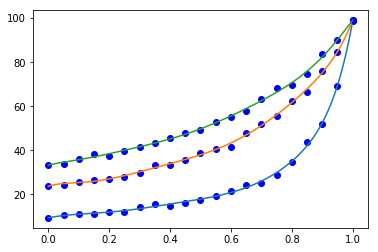

In [28]:
%matplotlib inline
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def drawFor(x,y):
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1, 'bo')
    x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    coefs = poly.polyfit(x, y, 8)
    ffit = poly.polyval(x_new, coefs)
    plt.plot(x_new, ffit)

drawFor(np.arange(0,1.05,0.05),pr01)
drawFor(np.arange(0,1.05,0.05),pr03)
drawFor(np.arange(0,1.05,0.05),pr05)
plt.show()